In [1]:
%matplotlib inline

import numpy as np
# import tensorflow as tf 
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.misc import imsave
import cv2

# import os 
# import matplotlib.pyplot as plt
# from matplotlib.image import imread
# from sklearn.utils import shuffle
# from scipy.misc import imsave
from scipy.misc import imresize
# import numpy as np
# from numpy import genfromtxt、
# import tensorflow as tf
# from PIL import Image
# import pickle
# # from tensorflow_vgg import vgg16
# import collections
# import time
# import math
# from sklearn.decomposition import PCA
import codecs
import os

## This section is intend to draw convergence curves
This section is a little bit trick, I adjust the data according cases, so it's not necessary to use my code to draw convergence curves, it's better to use yours, that would be much easier and understandable 

In [609]:
# The text data is collected during training
f = open('./OULP-C1V2_Pack/18f-20f_curve_data.txt','r')
message = f.read()

In [610]:
# 以换行符分开 split with '\n'
split_message = message.split('\n')

In [611]:
# 删除‘ ’空格行 delete the blank 
for idx, mess in enumerate(split_message):
    if mess == '':
        del split_message[idx]

In [612]:
# 把validation和train 分开 divide the validation and train sets
train_message = []
valid_message = []
count_valid_num = 0
for ii, mess in enumerate(split_message):
    if mess[:5] == 'Epoch':
        train_message.append(mess)
    if mess[:5] == 'Valid':
        count_valid_num += 1
#         valid_message.append('Iteration: {}'.format((count_valid_num)*100) + ',' + mess)
#         valid_message.append('Iteration: {}'.format(count_valid_num*75) + ',' + mess)
        if count_valid_num == 1:
            valid_message.append('Iteration: 25' + ',' + mess)
        else:
            valid_message.append('Iteration: {}'.format((count_valid_num-1)*100) + ',' + mess)

In [613]:
train_message[:10]

['Epoch: 1/3000,  Iteration: 25,  Train MSE: 0.0308,  0.1s /batch.  Train Accuracy: %30.396',
 'Epoch: 1/3000,  Iteration: 50,  Train MSE: 0.0157,  0.1s /batch.  Train Accuracy: %51.627',
 'Epoch: 1/3000,  Iteration: 75,  Train MSE: 0.0109,  0.1s /batch.  Train Accuracy: %69.019',
 'Epoch: 1/3000,  Iteration: 100,  Train MSE: 0.0085,  0.1s /batch.  Train Accuracy: %76.924',
 'Epoch: 1/3000,  Iteration: 125,  Train MSE: 0.0068,  0.1s /batch.  Train Accuracy: %81.639',
 'Epoch: 1/3000,  Iteration: 150,  Train MSE: 0.0058,  0.1s /batch.  Train Accuracy: %84.054',
 'Epoch: 1/3000,  Iteration: 175,  Train MSE: 0.0053,  0.1s /batch.  Train Accuracy: %85.171',
 'Epoch: 1/3000,  Iteration: 200,  Train MSE: 0.0047,  0.1s /batch.  Train Accuracy: %86.171',
 'Epoch: 1/3000,  Iteration: 225,  Train MSE: 0.0044,  0.1s /batch.  Train Accuracy: %86.669',
 'Epoch: 1/3000,  Iteration: 250,  Train MSE: 0.0040,  0.1s /batch.  Train Accuracy: %88.028']

In [614]:
valid_message[:10]

['Iteration: 25,Validation mse: 0.0214,  Validation accuracy: %38.028,',
 'Iteration: 100,Validation mse: 0.0115,  Validation accuracy: %65.852,',
 'Iteration: 200,Validation mse: 0.0080,  Validation accuracy: %77.903,',
 'Iteration: 300,Validation mse: 0.0062,  Validation accuracy: %82.733,',
 'Iteration: 400,Validation mse: 0.0052,  Validation accuracy: %85.451,',
 'Iteration: 500,Validation mse: 0.0045,  Validation accuracy: %86.750,',
 'Iteration: 600,Validation mse: 0.0041,  Validation accuracy: %87.789,',
 'Iteration: 700,Validation mse: 0.0037,  Validation accuracy: %88.530,',
 'Iteration: 800,Validation mse: 0.0034,  Validation accuracy: %88.965,',
 'Iteration: 900,Validation mse: 0.0032,  Validation accuracy: %89.513,']

In [625]:
train_acc = []
train_mse = []
train_iter = []
added_train_mse_idx = []
added_train_acc_idx = []

# select the numbers in the training information, add them to corresponding arrays, these arrays can used to plot 
# convergence curves
for idx, each_line in enumerate(train_message):
    for each_word in each_line.split(','):
    #         print(each_word[24:])
            # iteration
        if each_word[2:11] == 'Iteration':
#             if int(each_word[13:]) is not in train_iter:
            train_iter.append(int(each_word[13:]))
        # train_mse
#         if each_word[2:11] == 'Train mse':
        if each_word[2:11] == 'Train MSE':
#             if not round(float(each_word[13:])/65025.0, 4) in train_mse:
#                 train_mse.append(round(float(each_word[13:])/65025.0, 4))
            if not round(float(each_word[13:]), 4) in train_mse:
                train_mse.append(round(float(each_word[13:]), 4))
                added_train_mse_idx.append(idx)
            # train_acc
        if each_word[16:30] == 'Train Accuracy':
            if not round(float(each_word[33:]), 1) in train_acc:
                train_acc.append(round(float(each_word[33:]), 1))
                added_train_acc_idx.append(idx)
#         if each_word[21:35] == 'Train Accuracy':
#             if not round(float(each_word[38:]), 1) in train_acc:
#                 train_acc.append(round(float(each_word[38:]), 1))
#                 added_train_acc_idx.append(idx)
            
val_iter = []
val_acc = []
val_mse = []
added_val_acc_idx = []
added_val_mse_idx = []

for idx, each_line in enumerate(valid_message):
    for each_word in each_line.split(','):
#         print(each_word[2:21])
        if each_word[:9] == 'Iteration':
            val_iter.append(int(each_word[11:]))
        # val_mse
#         if each_word[:14] == 'Validation MSE':

        if each_word[:14] == 'Validation mse':
            if not round(float(each_word[16:]), 4) in val_mse:
                val_mse.append(round(float(each_word[16:]), 4))
                added_val_mse_idx.append(idx)
                
#         if each_word[2:16] == 'Validation mse':
#             if not round(float(each_word[18:]), 4) in val_mse:
#                 val_mse.append(round(float(each_word[18:]), 4))
#                 added_val_mse_idx.append(idx)
#         if each_word[2:16] == 'Validation MSE':
#             if not round(float(each_word[18:])/65025.0, 4) in val_mse:
#                 val_mse.append(round(float(each_word[18:])/65025.0, 4))
            
        # val_acc
        if each_word[2:21] == 'Validation accuracy':
#             if not round(float(each_word[24:]), 1) in val_acc:
#                 val_acc.append(round(float(each_word[24:]), 1))
#                 added_val_acc_idx.append(idx)
            
            if not round(float(each_word[24:]), 1) in val_acc:
                val_acc.append(round(float(each_word[24:]), 1))
                added_val_acc_idx.append(idx)

In [549]:
for each_line in valid_message:
    for each_word in each_line.split(','):
        print(each_word[23:])



75.691



89.789



91.587



92.148



92.323



92.453



92.485



92.480



92.477



92.354



92.505



92.141



92.496



92.597



92.519



92.430



92.536



92.871



92.681



92.757



92.801



92.928



92.871



92.972



92.838



93.050



92.823



92.978



92.830



92.904



92.903



92.857



92.761



92.757



93.072



92.827



92.767



92.866



93.086



92.907



93.053



92.987



93.112



92.898



93.058



92.988



92.966



92.792



93.027



92.734



92.874



93.106



92.976



92.614



92.840



93.137



93.009



92.853



92.778



92.979



92.720



93.170


In [626]:
new_train_mse_iter = []
for ii in added_train_mse_idx:
    new_train_mse_iter.append(train_iter[ii])

In [627]:
new_val_mse_iter = []
for ii in added_val_mse_idx:
    new_val_mse_iter.append(val_iter[ii])

In [628]:
# new_val_mse_iter.append(new_train_mse_iter[-1])
# val_mse.append(val_mse[-1])

In [629]:
new_train_mse_iter

[25,
 50,
 75,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 375,
 425,
 475,
 500,
 525,
 550,
 600,
 625,
 675,
 700,
 775,
 825,
 1050,
 1200,
 1225,
 1575,
 1900,
 2225,
 2925,
 3175,
 4250,
 6575,
 8625,
 12925,
 24075]

In [630]:
new_val_mse_iter

[25,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1500,
 1800,
 2000,
 2300,
 2500,
 2900,
 3200,
 3900,
 4100,
 5200,
 6100,
 7400,
 9400,
 12200,
 16500,
 23200,
 35600,
 65100]

In [242]:
new_val_mse_iter[0] = 35

In [633]:
val_mse[0] = train_mse [0]


In [414]:
cut_idx = None
for idx, ii in enumerate(new_train_mse_iter):
    if ii == 14600:
        cut_idx = idx
print(cut_idx)

34


In [415]:
new_train_mse_iter = new_train_mse_iter[:cut_idx]
# del train_mse[-2]
train_mse = train_mse[:cut_idx]

In [631]:
new_train_mse_iter.append(new_val_mse_iter[-1])
train_mse.append(train_mse[-1])

# new_val_mse_iter.append(new_train_mse_iter[-1])
# val_mse.append(val_mse[-1])

In [563]:
# new_val_mse_iter[0] = 25
val_mse[0] = train_mse[0]

In [ ]:
# val_mse = val_mse[:min_mse_idx+1]
# val_iter = val_iter[:min_mse_idx+1]

# train_mse = train_mse[:int(val_iter[-1]/25 + 1)]
# train_iter = train_iter[:int(val_iter[-1]/25 + 1)]

In [875]:
# new_train_mse = val_mse
# new_train_mse[int(len(new_train_mse)*0.5):] = [ii - 0.01 for ii in val_mse[int(len(new_train_mse)*0.5):]]

In [319]:
del train_mse[24]
del new_train_mse_iter[24]

In [397]:
train_mse = np.round(train_mse, decimals=3)
val_mse = np.round(val_mse, decimals=3)

In [399]:
train_mse

array([ 0.016,  0.011,  0.009,  0.008,  0.006,  0.006,  0.005,  0.005,
        0.005,  0.004,  0.004,  0.004,  0.004,  0.004,  0.003,  0.003,
        0.003,  0.003,  0.003,  0.003,  0.002,  0.002,  0.002,  0.002,
        0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.002,  0.001,
        0.001,  0.001,  0.001,  0.001,  0.001,  0.001])

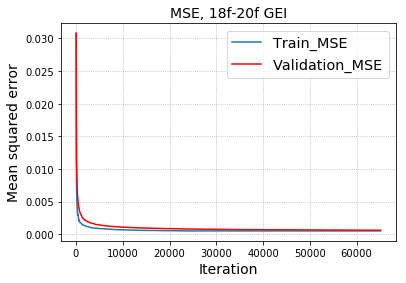

In [634]:
title = '18f-20f'
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)
plt.grid(linestyle=':')
plt.title('MSE, {} GEI'.format(title), fontsize=14)
plt.plot(new_train_mse_iter, train_mse,  label='Train_MSE')
plt.plot(new_val_mse_iter, val_mse, 'r', label='Validation_MSE')
# plt.plot(np.arange(75, 58780, 75), CMC_point_full, label='Ground Truth') 
plt.legend(loc='upper right', fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/{}_MSE_Curve.eps'.format(title), format='eps', dpi=1000, bbox_inches='tight')
# plt.ylim(np.array(CMC_point_5f).min() * 0.9, 100)


In [350]:
# new_train_acc = []

# new_train_acc_iter_2 = new_train_acc_iter[1:]
# for ii in range(len(train_acc)-1):
#     new_train_acc.append((train_acc[ii] + train_acc[ii + 1]) / 2)
# #     if ii%2 == 0:
# #         new_train_acc_iter_2.append(new_train_acc_iter[ii])

In [635]:
new_train_acc_iter = []
for ii in added_train_acc_idx:
    new_train_acc_iter.append(train_iter[ii])

In [636]:
new_val_acc_iter = []
for ii in added_val_acc_idx:
    new_val_acc_iter.append(val_iter[ii])

In [637]:
new_train_acc_iter

[25,
 50,
 75,
 100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 325,
 375,
 400,
 425,
 475,
 500,
 525,
 550,
 600,
 625,
 675,
 700,
 750,
 775,
 800,
 825,
 875,
 900,
 925,
 975,
 1025,
 1100,
 1175,
 1200,
 1225,
 1275,
 1325,
 1450,
 1575,
 1600,
 1625,
 1675,
 1875,
 1950,
 2100,
 2175,
 2225,
 2250,
 2575,
 2650,
 2925,
 3100,
 3150,
 3175,
 3225,
 3350,
 3800,
 4000,
 4250,
 4300,
 4375,
 5000,
 5275,
 5675,
 6000,
 6575,
 6600,
 7875,
 7900,
 8225,
 8625,
 9750,
 11525,
 11650,
 12200,
 12925,
 15350,
 15750,
 19225,
 19800,
 23950,
 24075,
 27925,
 32525]

In [638]:
new_val_acc_iter

[25,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 2000,
 2100,
 2300,
 2400,
 2500,
 2700,
 2800,
 2900,
 3000,
 3200,
 3300,
 3700,
 3800,
 4000,
 4100,
 4300,
 4500,
 5100,
 5200,
 5900,
 6000,
 6100,
 6400,
 6800,
 7100,
 7400,
 7700,
 8500,
 8900,
 9400,
 9800,
 11100,
 11200,
 11900,
 12200,
 13700,
 14200,
 16200,
 16500,
 18000,
 18700,
 20400,
 22300,
 23200,
 25400,
 27300,
 29100,
 33000,
 36000,
 39000,
 43400,
 48100,
 54100,
 61000,
 71300,
 84400,
 102000]

In [302]:
cut_idx = None
for idx, ii in enumerate(new_train_acc_iter):
    if ii == 24000:
        cut_idx = idx
print(cut_idx)

72


In [305]:
new_train_acc_iter = new_train_acc_iter[:cut_idx]
train_acc = train_acc[:cut_idx]

In [639]:
# new_val_acc_iter.append(new_train_acc_iter[-1])
# val_acc.append(val_acc[-1])

new_train_acc_iter.append(new_val_acc_iter[-1])
train_acc.append(train_acc[-1])

In [640]:
val_acc[0] = train_acc[0]

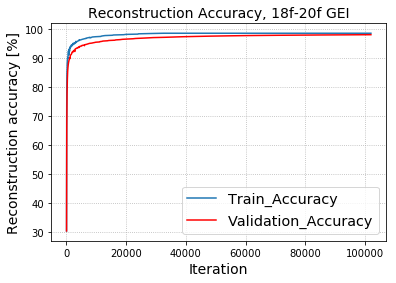

In [641]:
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Reconstruction accuracy [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Reconstruction Accuracy, {} GEI'.format(title), fontsize=14)
plt.plot(new_train_acc_iter, train_acc,  label='Train_Accuracy')
plt.plot(new_val_acc_iter, val_acc, 'r', label='Validation_Accuracy')
# plt.plot(np.arange(75, 58780, 75), CMC_point_full, label='Ground Truth') 
plt.legend(loc='lower right', fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/{}_Acc_Curve.eps'.format(title), format='eps', dpi=1000, bbox_inches='tight')
# plt.ylim(np.array(CMC_point_5f).min() * 0.9, 100)

# save
The data I used to draw the convergence curves for my thesis have been saved in OULP-C1V2_Pack folder

In [642]:
save_curve_dict = {'new_train_mse_iter': new_train_mse_iter, 'train_mse': train_mse, 'new_val_mse_iter': new_val_mse_iter,
                   'val_mse': val_mse, 'new_train_acc_iter': new_train_acc_iter, 'train_acc': train_acc, 
                   'new_val_acc_iter':new_val_acc_iter, 'val_acc': val_acc}

In [643]:
with open('./OULP-C1V2_Pack/{}_Curve_points'.format(title), 'wb') as f:
    np.save(f, save_curve_dict)

In [654]:
title = '20f-Complete'
curve_points = np.load(open(r'./OULP-C1V2_Pack/{}_Curve_points'.format(title), mode='rb'))

In [644]:
title = 'All-to-Complete'
curve_points = np.load(open(r'./OULP-C1V2_Pack/All-to-Complete_Curve_points', mode='rb'))

In [650]:
curve_points

array({'new_train_mse_iter': [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 525, 575, 625, 725, 775, 900, 1000, 1175, 1275, 1425, 1950, 2425, 3200, 3550, 5175, 6225, 9350, 10780], 'train_mse': [0.0168, 0.012, 0.0088, 0.0071, 0.0059, 0.0053, 0.0049, 0.0043, 0.004, 0.0037, 0.0035, 0.0034, 0.0031, 0.0029, 0.003, 0.0026, 0.0027, 0.0025, 0.0023, 0.0022, 0.0021, 0.002, 0.0019, 0.0018, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0012, 0.0011, 0.001, 0.0009, 0.0008, 0.0008], 'new_val_mse_iter': [35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455, 490, 525, 560, 595, 665, 700, 840, 910, 1015, 1225, 1400, 1820, 2030, 2590, 3500, 4375, 6580, 10780], 'val_mse': [0.0241, 0.0126, 0.0086, 0.0067, 0.0055, 0.0047, 0.0042, 0.0038, 0.0035, 0.0033, 0.0031, 0.0029, 0.0028, 0.0027, 0.0026, 0.0025, 0.0024, 0.0023, 0.0022, 0.0021, 0.002, 0.0019, 0.0018, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0012, 0.0011, 0.001], 'new_train_acc_iter': [50, 75, 100, 125, 150, 17

In [651]:
new_train_mse_iter= [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 525, 575, 625, 725, 775, 900, 1000, 1175, 1275, 1425, 1950, 2425, 3200, 3550, 5175, 6225, 9350, 10780]
train_mse= [0.0168, 0.012, 0.0088, 0.0071, 0.0059, 0.0053, 0.0049, 0.0043, 0.004, 0.0037, 0.0035, 0.0034, 0.0031, 0.0029, 0.003, 0.0026, 0.0027, 0.0025, 0.0023, 0.0022, 0.0021, 0.002, 0.0019, 0.0018, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0012, 0.0011, 0.001, 0.0009, 0.0008, 0.0008]
new_val_mse_iter= [35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455, 490, 525, 560, 595, 665, 700, 840, 910, 1015, 1225, 1400, 1820, 2030, 2590, 3500, 4375, 6580, 10780]
val_mse= [0.0241, 0.0126, 0.0086, 0.0067, 0.0055, 0.0047, 0.0042, 0.0038, 0.0035, 0.0033, 0.0031, 0.0029, 0.0028, 0.0027, 0.0026, 0.0025, 0.0024, 0.0023, 0.0022, 0.0021, 0.002, 0.0019, 0.0018, 0.0017, 0.0016, 0.0015, 0.0014, 0.0013, 0.0012, 0.0011, 0.001]
new_train_acc_iter= [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 325, 350, 375, 400, 425, 450, 500, 525, 550, 575, 625, 700, 750, 775, 800, 850, 900, 1025, 1075, 1100, 1175, 1275, 1300, 1350, 1400, 1425, 1525, 1750, 1800, 1950, 1975, 2050, 2425, 2475, 2600, 2700, 3025, 3200, 3550, 3575, 3775, 4100, 4675, 4725, 5050, 5425, 5475, 6225, 6350, 6650, 8000, 8550, 9400, 10325, 11475, 12525, 13525, 14600, 15100, 17750, 20775, 21225]
train_acc=[43.6, 63.6, 74.5, 79.7, 83.1, 84.8, 86.2, 87.6, 88.2, 88.8, 89.8, 90.4, 90.9, 90.3, 91.3, 91.1, 91.4, 91.5, 91.6, 91.8, 92.1, 92.5, 92.6, 92.7, 93.1, 92.9, 93.2, 93.3, 93.6, 93.4, 93.5, 94.1, 93.7, 93.9, 93.8, 94.0, 94.2, 94.4, 94.3, 94.6, 94.5, 94.7, 95.0, 95.2, 94.8, 94.9, 95.1, 95.3, 95.7, 95.4, 95.5, 95.6, 96.0, 95.8, 95.9, 96.2, 96.1, 96.5, 96.4, 96.3, 96.6, 96.7, 96.9, 96.8, 97.0, 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7]
new_val_acc_iter= [35, 70, 105, 140, 175, 210, 245, 280, 315, 350, 385, 420, 455, 490, 525, 560, 595, 630, 665, 700, 770, 805, 840, 875, 945, 1015, 1120, 1155, 1190, 1260, 1295, 1365, 1400, 1505, 1645, 1785, 1925, 2065, 2100, 2275, 2415, 2590, 2765, 2940, 3220, 3570, 3675, 4130, 4375, 4760, 5145, 5915, 6475, 7245, 8050, 8855, 10115, 12565, 14595, 20125, 21225]
val_acc= [31.3, 59.9, 74.7, 81.3, 84.5, 86.5, 87.6, 88.7, 89.3, 89.7, 90.2, 90.4, 90.7, 90.5, 91.3, 91.4, 91.6, 91.7, 91.8, 92.1, 91.9, 92.2, 92.3, 92.5, 92.6, 92.8, 92.7, 93.0, 93.1, 93.2, 93.3, 93.4, 93.5, 93.6, 93.7, 93.8, 94.0, 94.1, 94.2, 94.3, 93.9, 94.4, 94.5, 94.6, 94.7, 94.8, 94.9, 95.0, 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7, 95.8, 95.9, 96.0, 96.1, 96.2, 96.2]

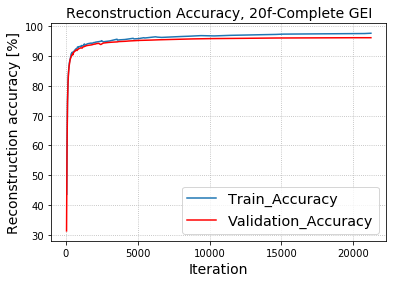

In [655]:
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Reconstruction accuracy [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Reconstruction Accuracy, {} GEI'.format(title), fontsize=14)
plt.plot(new_train_acc_iter, train_acc,  label='Train_Accuracy')
plt.plot(new_val_acc_iter, val_acc, 'r', label='Validation_Accuracy')
# plt.plot(np.arange(75, 58780, 75), CMC_point_full, label='Ground Truth') 
plt.legend(loc='lower right', fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/{}_Acc_Curve.eps'.format(title), format='eps', dpi=1000, bbox_inches='tight')

# plt.ylim(np.array(CMC_point_5f).min() * 0.9, 100)

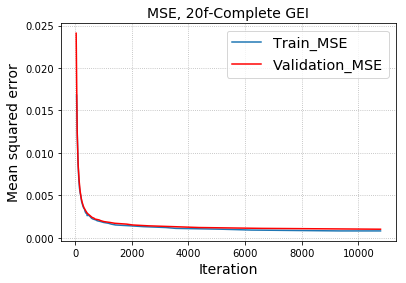

In [656]:
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)
plt.grid(linestyle=':')
plt.title('MSE, {} GEI'.format(title), fontsize=14)
plt.plot(new_train_mse_iter, train_mse,  label='Train_MSE')
plt.plot(new_val_mse_iter, val_mse, 'r', label='Validation_MSE')
plt.legend(loc='upper right', fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/{}_MSE_Curve.eps'.format(title), format='eps', dpi=1000, bbox_inches='tight')

# Create samples

In [296]:
targets = []
samples = []
predicted = []
diff = []
for ii in range(1, 11):
    targets.append(imread('./OULP-C1V2_Pack/Samples/5f-full-samples/targets/{}.png'.format(ii)))
    samples.append(imread('./OULP-C1V2_Pack/Samples/5f-full-samples/samples/{}.png'.format(ii)))
    predicted.append(imread('./OULP-C1V2_Pack/Samples/5f-full-samples/predicted/{}.png'.format(ii)))
    diff.append(imread('./OULP-C1V2_Pack/Samples/5f-full-samples/diff/{}.png'.format(ii)))

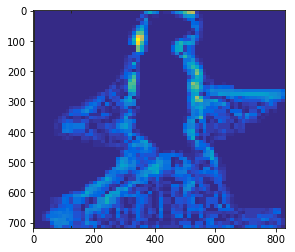

In [319]:
plt.imshow(diff[0][3:720, 34:863])

In [320]:
for ii, img in enumerate(diff):
#     imsave('./OULP-C1V2_Pack/Samples/15f-full-samples/diff/{}.png'.format(ii+1), img[2:162, 34:193])
    imsave('./OULP-C1V2_Pack/Samples/5f-full-samples/diff/{}.png'.format(ii+1), img[3:720, 34:863])
#     imsave('./OULP-C1V2_Pack/Samples/5f-full-samples/diff/{}.png'.format(ii+1), img[60:815, 100:1070])
#     imsave('./OULP-C1V2_Pack/Samples/10f-full-samples/diff/{}.png'.format(ii), img)

In [156]:
new_diff = []
for img in diff:
    new_diff.append(imresize(img, [80,80,3], interp='nearest'))

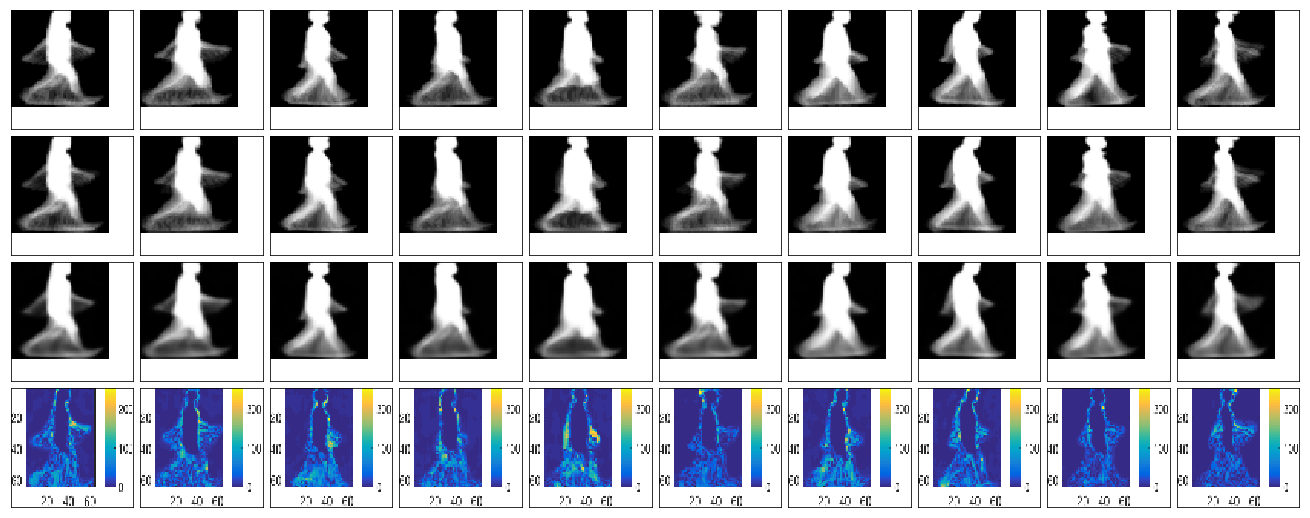

In [157]:
targets = np.array(targets)
samples = np.array(samples)
predicted = np.array(predicted)
diff = np.array(diff)

fig, axes = plt.subplots(nrows=4, ncols=10, sharex=True, sharey=True, figsize=(18,7))

for images, row in zip([samples, targets, predicted, new_diff], axes):
    for img, ax in zip(images, row):
        ax.imshow(img, cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)


fig.tight_layout(pad=0.01)

In [324]:
GFI_1 = imread('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/GFI_1.png')
GFI = imread('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/GFI.png')

In [328]:
GFI.shape

(300, 208, 3)

In [326]:
np.concatenate([GFI_1, GFI], axis= 0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

# Draw activation function

In [136]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def tanh(x):
    a = []
    for item in x:
        a.append((math.exp(item) - math.exp(-item)) / (math.exp(item) + math.exp(-item)))
    return a

def relu(x):
    a = []
    for item in x:
        a.append(max(0, item))
    return a

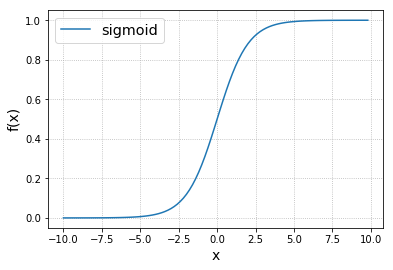

In [139]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig, label='sigmoid')
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.grid(linestyle=':')
plt.legend(fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/sigmoid.eps', format='eps', dpi=1000)
plt.show()


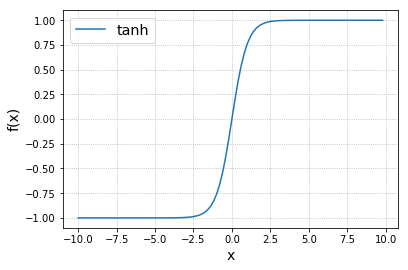

In [138]:
x = np.arange(-10., 10., 0.2)
tanh = tanh(x)
plt.plot(x,tanh, label='tanh')
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.grid(linestyle=':')
plt.legend(fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/tanh.eps', format='eps', dpi=1000)
plt.show()

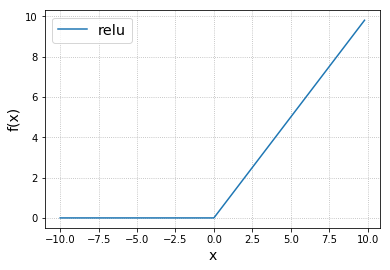

In [137]:
x = np.arange(-10., 10., 0.2)
relu = relu(x)
plt.plot(x,relu, label='relu')
plt.xlabel('x',fontsize=14)
plt.ylabel('f(x)',fontsize=14)
plt.grid(linestyle=':')
plt.legend(fontsize='x-large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/relu.eps', format='eps', dpi=1000)
plt.show()

# ROC Curves

In [323]:
full_FAR = np.load(open(r'./Recognition rate/PCA_99%/FAR_full_14types', mode='rb'))
full_FRR = np.load(open(r'./Recognition rate/PCA_99%/FRR_full_14types', mode='rb'))

694

In [374]:
# calculate the mean of 14 types incomplete GEIs' FAR FRR
n_f = '1f'
min_len = 10000
for ii in range(14):
    Incom_A = np.load(open(r'./Recognition rate/PCA_99%/FAR_Incom_{}_{}'.format(n_f, ii+1), mode='rb'))
    Incom_R = np.load(open(r'./Recognition rate/PCA_99%/FRR_Incom_{}_{}'.format(n_f, ii+1), mode='rb'))
    if len(Incom_A) < min_len:
        min_len = len(Incom_A)
    if len(Incom_R) < min_len:
        min_len = len(Incom_R)
print(min_len)

Incom_A = np.zeros([min_len])
Incom_R = np.zeros([min_len])
for ii in range(14):
    Incom_A = Incom_A + np.load(open(r'./Recognition rate/PCA_99%/FAR_Incom_{}_{}'
                                     .format(n_f, ii+1), mode='rb'))[:min_len]
    Incom_R = Incom_R + np.load(open(r'./Recognition rate/PCA_99%/FRR_Incom_{}_{}'
                                     .format(n_f, ii+1), mode='rb'))[:min_len]
Incom_A = Incom_A/14.0
Incom_R = Incom_R/14.0

919


In [375]:
# calculate the mean of 14 types incomplete GEIs' FAR FRR
min_len = 10000
for ii in range(14):
    pre_A = np.load(open(r'./Recognition rate/PCA_99%/FAR_Pred_{}_{}'.format(n_f, ii+1), mode='rb'))
    pre_R = np.load(open(r'./Recognition rate/PCA_99%/FRR_Pred_{}_{}'.format(n_f, ii+1), mode='rb'))
    if len(pre_A) < min_len:
        min_len = len(pre_A)
    if len(pre_R) < min_len:
        min_len = len(pre_R)
print(min_len)

pre_A = np.zeros([min_len])
pre_R = np.zeros([min_len])
for ii in range(14):
    pre_A = pre_A + np.load(open(r'./Recognition rate/PCA_99%/FAR_Pred_{}_{}'
                                     .format(n_f, ii+1), mode='rb'))[:min_len]
    pre_R = pre_R + np.load(open(r'./Recognition rate/PCA_99%/FRR_Pred_{}_{}'
                                     .format(n_f, ii+1), mode='rb'))[:min_len]
pre_A = pre_A/14.0
pre_R = pre_R/14.0

590


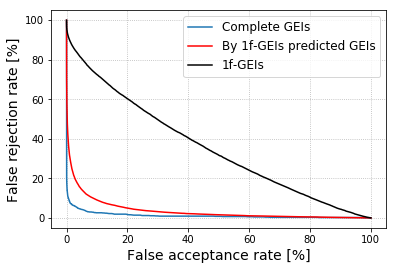

In [376]:
plt.xlabel('False acceptance rate [%]', fontsize=14)
plt.ylabel('False rejection rate [%]', fontsize=14)
plt.grid(linestyle=':')
# plt.title('MSE, {} GEI'.format(title), fontsize=14)
plt.plot(full_FAR, full_FRR,  label='Complete GEIs')
plt.plot(pre_A, pre_R, 'r', label='By {}-GEIs predicted GEIs'.format(n_f))
plt.plot(Incom_A, Incom_R, 'k', label='{}-GEIs'.format(n_f))
plt.legend(loc='upper right', fontsize='large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/ROC_{}.eps'.format(n_f), format='eps', dpi=1000)

# CMC Curves

In [447]:
n_f = '20f'
CMC_pred = np.load(open(r'./Recognition rate/PCA_99%/CMC_{}'.format(n_f), mode='rb'))
CMC_incom = np.load(open(r'./Recognition rate/PCA_99%/CMC_incom_{}'.format(n_f), mode='rb'))
CMC_full = np.load(open(r'./Recognition rate/PCA_99%/CMC_full', mode='rb'))

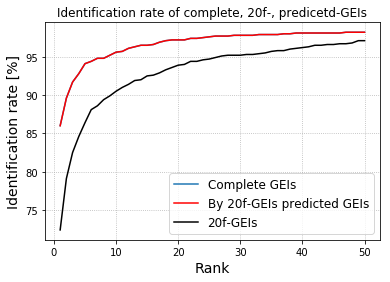

In [450]:
plt.xlabel('Rank', fontsize=14)
plt.ylabel('Identification rate [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Identification rate of complete, {}-, predicetd-GEIs'.format(n_f), fontsize=12)
plt.plot(np.arange(1,50+1), CMC_full,  label='Complete GEIs')
plt.plot(np.arange(1,50+1), CMC_pred, 'r', label='By {}-GEIs predicted GEIs'.format(n_f))
plt.plot(np.arange(1,50+1), CMC_incom, 'k', label='{}-GEIs'.format(n_f))
plt.legend(fontsize='large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/CMC_{}.eps'.format(n_f), format='eps', dpi=1000)

In [479]:
for ii in range(12, 1, -2):
    print(32*(1/ii))

2.6666666666666665
3.2
4.0
5.333333333333333
8.0
16.0


In [513]:
cycle = 25
print(cycle*(2/3))
print(cycle*(3/5))
print(cycle*(1/2))
print(cycle*(3/7))
print(cycle*(1/3))
print(cycle*(1/4))
print(cycle*(1/6))
print(cycle*(1/8))

16.666666666666664
15.0
12.5
10.714285714285714
8.333333333333332
6.25
4.166666666666666
3.125


In [ ]:
20 18 15 13 10 8 5 3 1 

In [ ]:
17, 15, 13, 10, 8, 6, 4, 2, 1

In [7]:
pred = [53.40, 65.11, 71.19, 77.53, 80.46, 82.59, 84.22, 85.76, 86.00]
incom = [8.42, 12.70, 17.09, 26.50, 34.61, 61.96, 72.40, 72.94, 73.06]
complete = [86.00, 86.00, 86.00, 86.00, 86.00, 86.00, 86.00, 86.00, 86.00]
x = [1, 2, 3, 4, 5,6,7,8,9]

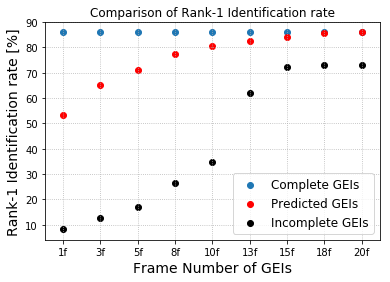

In [11]:
plt.xlabel('Frame Number of GEIs', fontsize=14)
plt.ylabel('Rank-1 Identification rate [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Comparison of Rank-1 Identification rate', fontsize=12)
plt.scatter(x, complete,  label='Complete GEIs')
plt.scatter(x, pred,c='red', label='Predicted GEIs')
plt.scatter(x, incom, c='black', label='Incomplete GEIs')
group_labels = ['1f', '3f','5f','8f','10f', '13f', '15f', '18f', '20f']  
plt.xticks(x, group_labels, rotation=0)  
plt.legend(fontsize='large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/Rank-1-trend.eps', format='eps', dpi=1000)
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/Rank-1-trend.jpg')

In [12]:
pred = [73.35, 82.57, 86.39, 89.95, 91.67, 93.06, 93.02, 93.75, 94.10]
incom = [12.81, 17.76, 24.24, 35.62, 47.83, 77.31, 85.53, 86.40, 86.98]
complete = [94.10, 94.10, 94.10, 94.10, 94.10, 94.10, 94.10, 94.10, 94.10]
x = [1, 2, 3, 4, 5,6,7,8,9]

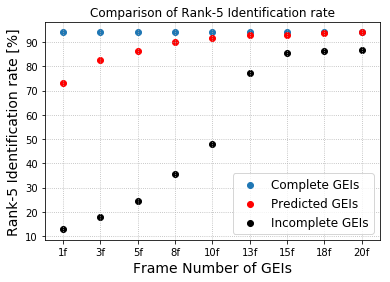

In [13]:
plt.xlabel('Frame Number of GEIs', fontsize=14)
plt.ylabel('Rank-5 Identification rate [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Comparison of Rank-5 Identification rate', fontsize=12)
plt.scatter(x, complete,  label='Complete GEIs')
plt.scatter(x, pred,c='red', label='Predicted GEIs')
plt.scatter(x, incom, c='black', label='Incomplete GEIs')
group_labels = ['1f', '3f','5f','8f','10f', '13f', '15f', '18f', '20f']  
plt.xticks(x, group_labels, rotation=0)  
plt.legend(fontsize='large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/Rank-5-trend.eps', format='eps', dpi=1000)
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/Rank-5-trend.jpg')

In [14]:
pred = [9.35, 7.31 , 6.28, 5.52, 5.20, 4.75, 4.48, 4.18, 4.06]
incom = [40.16, 37.97, 34.61, 26.54, 18.49, 9.18, 7.39, 6.20, 6.12]
complete = [4.54, 4.54, 4.54, 4.54, 4.54, 4.54, 4.54, 4.54, 4.54]
x = [1, 2, 3, 4, 5,6,7,8,9]

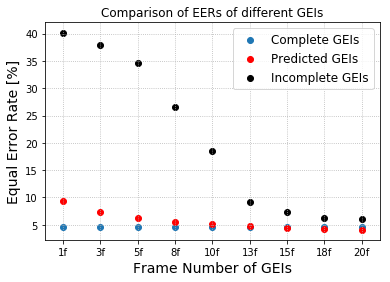

In [16]:
plt.xlabel('Frame Number of GEIs', fontsize=14)
plt.ylabel('Equal Error Rate [%]', fontsize=14)
plt.grid(linestyle=':')
plt.title('Comparison of EERs of different GEIs', fontsize=12)
plt.scatter(x, complete,  label='Complete GEIs')
plt.scatter(x, pred,c='red', label='Predicted GEIs')
plt.scatter(x, incom, c='black', label='Incomplete GEIs')
group_labels = ['1f', '3f','5f','8f','10f', '13f', '15f', '18f', '20f']  
plt.xticks(x, group_labels, rotation=0)  
plt.legend(fontsize='large')
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/EER-trend.eps', format='eps', dpi=1000)
plt.savefig('/Users/congcong/Desktop/Gait/Studenttemplate-mmkthesis_0.6/figures/EER-trend.jpg')